# IMPORT LIBRARIES

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# LOAD DATA

In [67]:
# Fetch Glass dataset from OpenML
glass = fetch_openml(name="glass", version=1, as_frame=True)

df = glass.frame
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build wind float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic wind float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build wind float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build wind non-float


# ASSIGN CORRECT COLUMN NAMES

In [68]:
print(df.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


# BASIC DATA CHECK

In [69]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


# CHECK MISSING VALUES

In [70]:
df.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

# Histograms

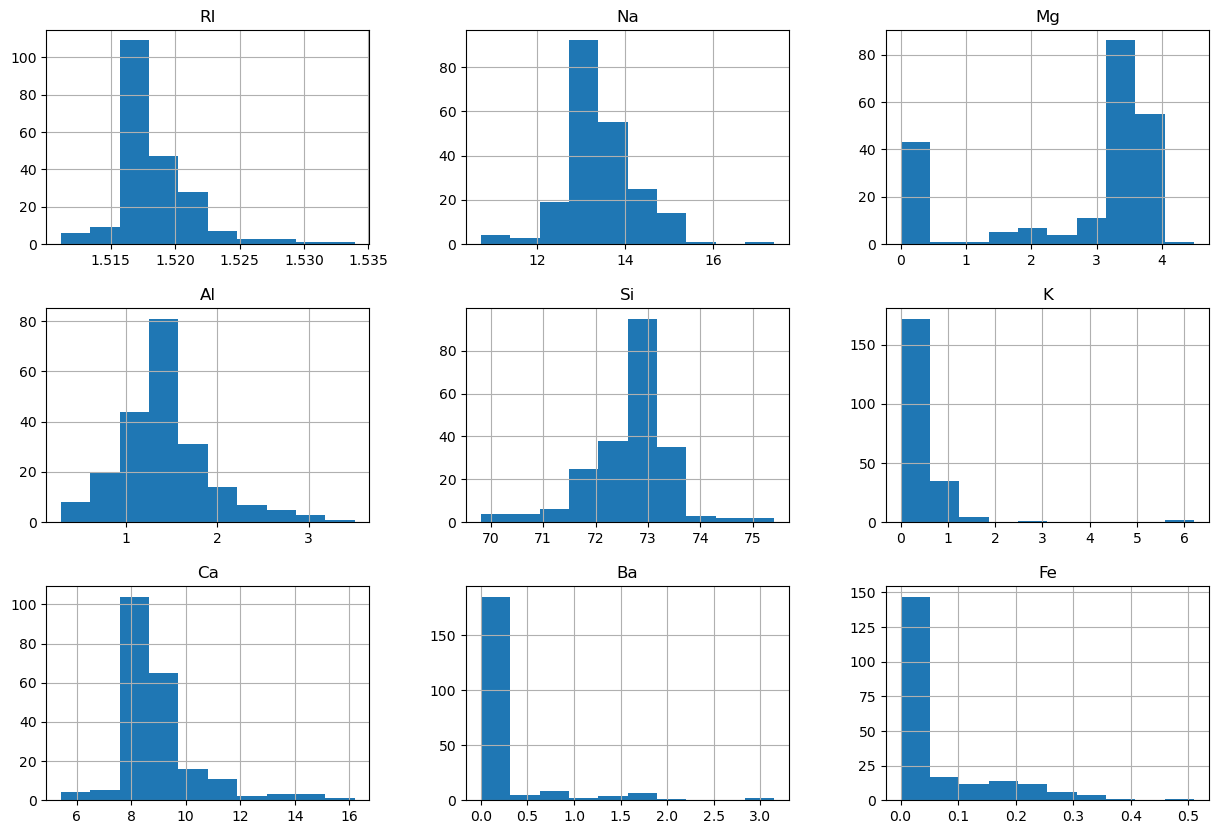

In [57]:
df.hist(figsize=(15,10))
plt.show()



# Boxplots (Outlier Detection)

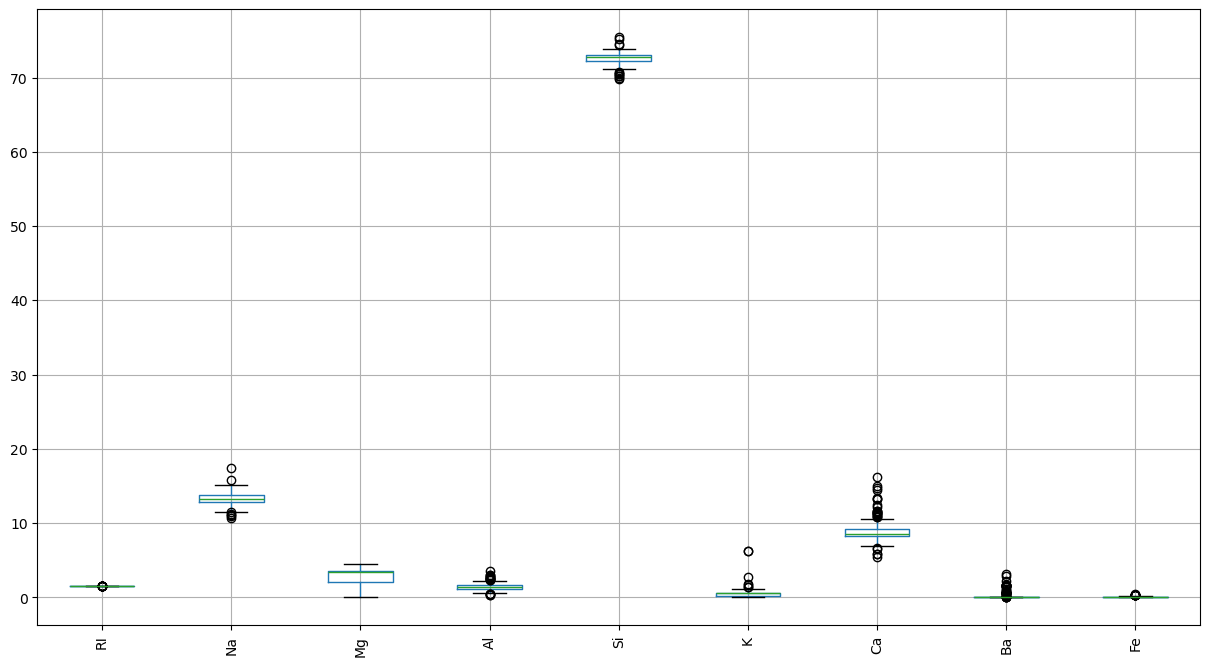

In [58]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


In [59]:
# Automatically select target as last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)


(214, 9) (214,)


# Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train–Test Split

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.813953488372093
                      precision    recall  f1-score   support

    build wind float       0.74      1.00      0.85        14
build wind non-float       1.00      0.73      0.85        15
          containers       1.00      0.67      0.80         3
           headlamps       0.75      1.00      0.86         6
           tableware       0.50      0.50      0.50         2
    vehic wind float       1.00      0.33      0.50         3

            accuracy                           0.81        43
           macro avg       0.83      0.71      0.73        43
        weighted avg       0.86      0.81      0.80        43



# Bagging

In [64]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging.fit(X_train, y_train)
bag_pred = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))
print(classification_report(y_test, bag_pred))


Bagging Accuracy: 0.813953488372093
                      precision    recall  f1-score   support

    build wind float       0.81      0.93      0.87        14
build wind non-float       1.00      0.67      0.80        15
          containers       0.67      0.67      0.67         3
           headlamps       0.86      1.00      0.92         6
           tableware       0.67      1.00      0.80         2
    vehic wind float       0.50      0.67      0.57         3

            accuracy                           0.81        43
           macro avg       0.75      0.82      0.77        43
        weighted avg       0.85      0.81      0.81        43



# Boosting (AdaBoost)

In [72]:
boosting = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42
)

boosting.fit(X_train, y_train)
boost_pred = boosting.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, boost_pred))
print(classification_report(y_test, boost_pred))


Boosting Accuracy: 0.5813953488372093
                      precision    recall  f1-score   support

    build wind float       0.50      0.79      0.61        14
build wind non-float       0.55      0.40      0.46        15
          containers       0.00      0.00      0.00         3
           headlamps       0.86      1.00      0.92         6
           tableware       1.00      1.00      1.00         2
    vehic wind float       0.00      0.00      0.00         3

            accuracy                           0.58        43
           macro avg       0.48      0.53      0.50        43
        weighted avg       0.52      0.58      0.54        43



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1️⃣ Bagging and Boosting Methods
🔹 Bagging (Bootstrap Aggregation)

Bagging is an ensemble learning technique used to reduce variance and improve model stability.
In bagging, multiple models are trained independently on different bootstrapped samples (random samples with replacement) of the training dataset.
The final prediction is obtained by aggregating the predictions of all models, usually by majority voting in classification.

Example: Random Forest is a bagging-based algorithm.

# 🔹 Boosting

Boosting is an ensemble learning technique used to reduce bias and improve model accuracy.
In boosting, models are trained sequentially, where each new model focuses more on the data points that were misclassified by previous models.
Each model is given a weight based on its performance, and the final prediction is a weighted combination of all models.

Example: AdaBoost, Gradient Boosting.